In [3]:
import pandas as pd

dados = pd.read_csv('precos.csv')
dados.head()

,milhas_por_ano,ano_do_modelo,preco,vendido
0,21801,2000,30941.02,1
1,7843,1998,40557.96,1
2,7109,2006,89627.50,0
3,26823,2015,95276.14,0
4,7935,2014,117384.68,1


In [4]:
dados['km_por_ano'] = dados['milhas_por_ano'] * 1.60934
dados.head()

,milhas_por_ano,ano_do_modelo,preco,vendido,km_por_ano
0,21801,2000,30941.02,1,35085.22134
1,7843,1998,40557.96,1,12622.05362
2,7109,2006,89627.50,0,11440.79806
3,26823,2015,95276.14,0,43167.32682
4,7935,2014,117384.68,1,12770.11290


In [5]:
from datetime import datetime
dados["idade"] = datetime.today().year - dados['ano_do_modelo']

dados.drop(["milhas_por_ano", "ano_do_modelo"], axis=1, inplace=True)

In [6]:
x = dados[['preco', 'idade', 'km_por_ano']]
y = dados['vendido']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

SEED = 20

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED,
                                                         stratify = y)
print(f"Treinaremos com {len(raw_treino_x)}")
print(f"Testaremos com {len(raw_teste_x)}")

scaler = StandardScaler()
scaler.fit(raw_treino_x)

treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")

Treinaremos com 7500
Testaremos com 2500
A acurácia foi de 75.92%


In [8]:
from sklearn.dummy import DummyClassifier

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED,
                                                         stratify = y)
print(f"Treinaremos com {len(raw_treino_x)}")
print(f"Testaremos com {len(raw_teste_x)}")

classificador = DummyClassifier(strategy='stratified')
classificador.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")

Treinaremos com 7500
Testaremos com 2500


c:\Users\leoka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


A acurácia foi de 58.00%


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED,
                                                         stratify = y)
print(f"Treinaremos com {len(raw_treino_x)}")
print(f"Testaremos com {len(raw_teste_x)}")

#scaler = StandardScaler()
#scaler.fit(raw_treino_x)

#treino_x = scaler.transform(raw_treino_x)
#teste_x = scaler.transform(raw_teste_x)

modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")

Treinaremos com 7500
Testaremos com 2500
A acurácia foi de 78.40%


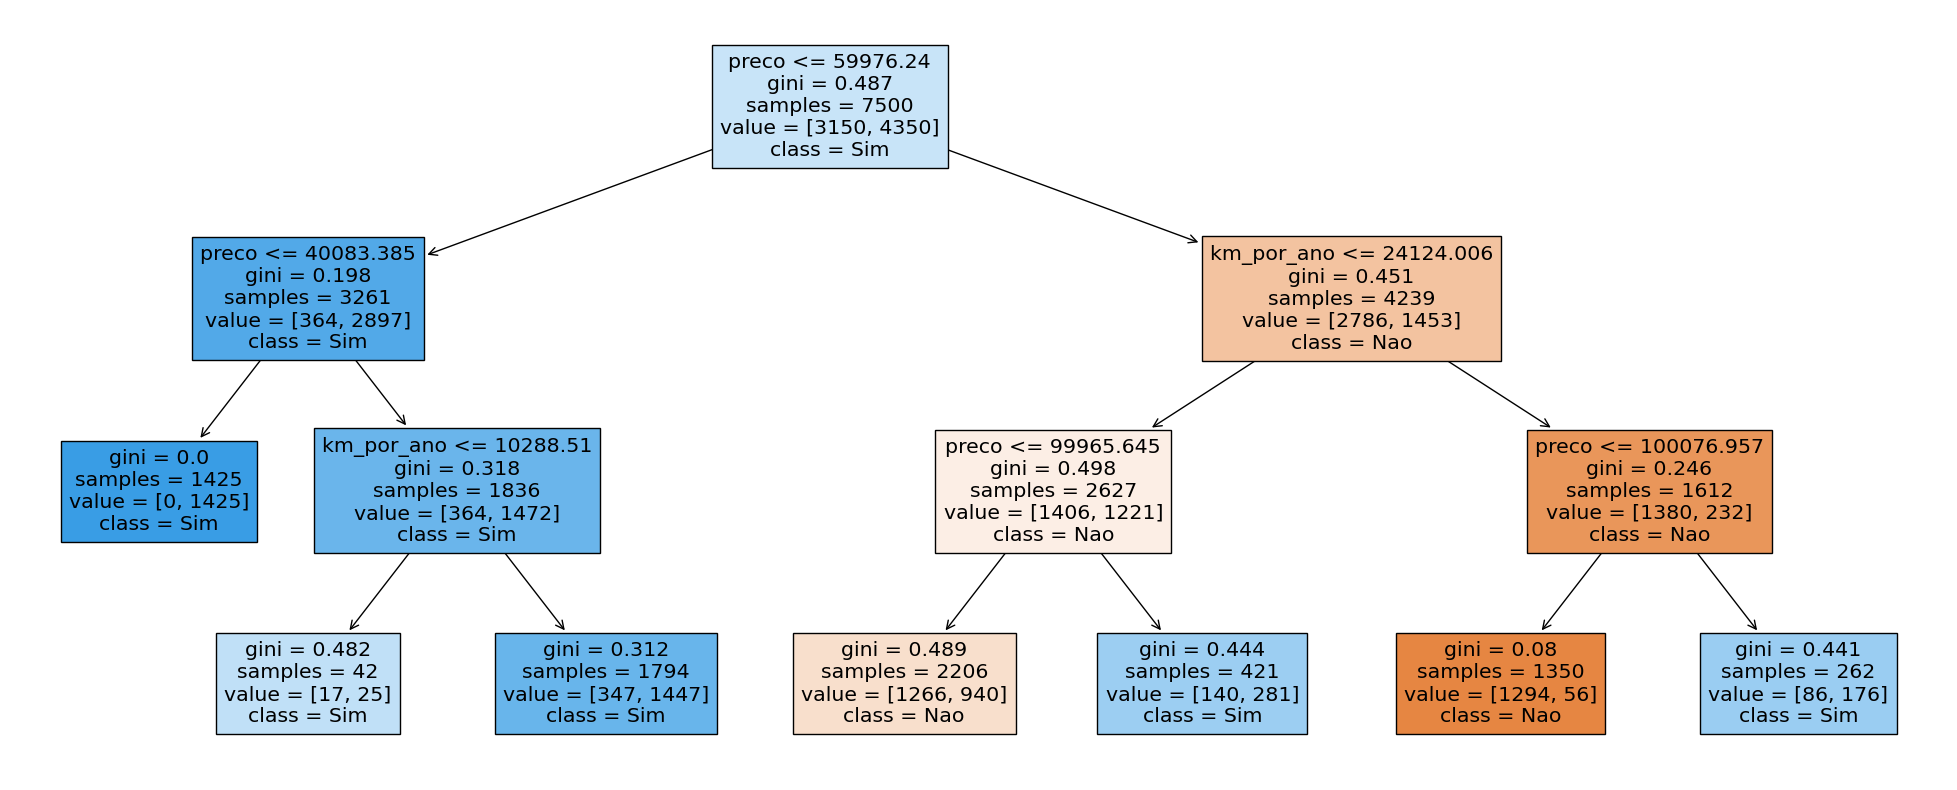

In [26]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25,10))
tree.plot_tree(modelo, filled=True, feature_names=x.columns, class_names=["Nao", "Sim"]);